In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,8))

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

In [ ]:
train=pd.read_csv('/content/drive/MyDrive/Data/Employee/Employee train.csv')
test=pd.read_csv("/content/drive/MyDrive/Data/Employee/Employee test.csv")

In [ ]:
print("Employee Training Data Shape = ",train.shape)
print("Employee Testining Data Shape = ",test.shape)

Employee Training Data Shape =  (54808, 14)
Employee Testining Data Shape =  (23490, 13)


In [ ]:
#Check Column in Train Data
train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [ ]:
test.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score'],
      dtype='object')

# Is_promoted columns not present in test data set because it is a target columns,which we have to predict using a machine learing model.

## Data cleaning Processes


In [ ]:
Missing_val=train.isnull().sum()/train.shape[0]*100
print(Missing_val)

employee_id             0.000000
department              0.000000
region                  0.000000
education               4.395344
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    7.524449
length_of_service       0.000000
KPIs_met >80%           0.000000
awards_won?             0.000000
avg_training_score      0.000000
is_promoted             0.000000
dtype: float64


# First Check Descriptive Statisics Summary of all continuous & catgorical Variable


In [ ]:
# Check Continuous Variable, Count,Avrage,Stander Deviation,MIn And Max,25,50 and 75 percentiles.
train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [ ]:
# Check CoCatgorical Variable, Unique,count,top,& freq
train.describe(include='object')

,department,region,education,gender,recruitment_channel
count,54808,54808,52399,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,38496,30446


## avg_training column for the employee lie between 40 to 100 ,this is Good Distribution.
## Also the lenght of service in not having disruptive value.so we can keep them for model training.they are not going to harm us a lot.

In [ ]:
#Check Missing Value both Dataset
x_train=train.isnull().sum()
x1_train=train.isnull().sum()/train.shape[0]*100
y_test=test.isnull().sum()
y1_test=test.isnull().sum()/test.shape[0]*100
miss_val={'Total_Train_miss':x_train,'Total_Train_miss % ':x1_train,"Total_Test_miss":y_test,'Total_Test_miss %':y1_test}
Total_Miss_Val=pd.DataFrame(miss_val)
Total_Miss_Val.style.bar(color=['gold'])

,Total_Train_miss,Total_Train_miss %,Total_Test_miss,Total_Test_miss %
KPIs_met >80%,0,0.000000,0.000000,0.000000
age,0,0.000000,0.000000,0.000000
avg_training_score,0,0.000000,0.000000,0.000000
awards_won?,0,0.000000,0.000000,0.000000
department,0,0.000000,0.000000,0.000000
education,2409,4.395344,1034.000000,4.401873
employee_id,0,0.000000,0.000000,0.000000
gender,0,0.000000,0.000000,0.000000
is_promoted,0,0.000000,nan,nan
length_of_service,0,0.000000,0.000000,0.000000


#Treatment of Missing values

In [ ]:
print(train['education'].value_counts())
print("********************")
print(train['previous_year_rating'].value_counts())

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64
********************
3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: previous_year_rating, dtype: int64


In [ ]:
print(train['education'].value_counts())
print("********************")
print(train['previous_year_rating'].value_counts())

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64
********************
3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: previous_year_rating, dtype: int64


In [ ]:
#Let's imput Missing value in Train Dataset
train['education']=train['education'].fillna(train['education'].mode()[0])
train['previous_year_rating']=train['previous_year_rating'].fillna(train['previous_year_rating'].mean())
print("After impute Missing Value present in train dataset",train.isnull().sum())

After impute Missing Value present in train dataset employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64


In [ ]:
# let's Impute Missing Value In test Dataset
test['education']=test['education'].fillna(test['education'].mode()[0])
test['previous_year_rating']=test['previous_year_rating'].fillna(test['previous_year_rating'].mean())
print("After impute Missing Value present in train dataset",test.isnull().sum())

After impute Missing Value present in train dataset employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64


## Let's check the Target Column 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Target balance Col')

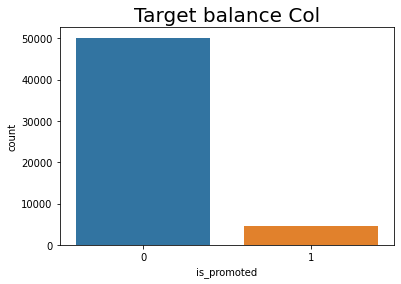

In [ ]:
#Check Target Cols
sns.countplot(train['is_promoted'])
plt.title("Target balance Col",fontsize=20)

I looked my target columns is higly unbalance,we must be make balance of target columns.Because when we use Machine Learning Models with inbalance target column.our machine learning model very bad result. 

# Check Distribution of dataset

In [ ]:
#Get Numerical Cols
num_col=train.select_dtypes(include='number').keys()
print(num_col)

Index(['employee_id', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

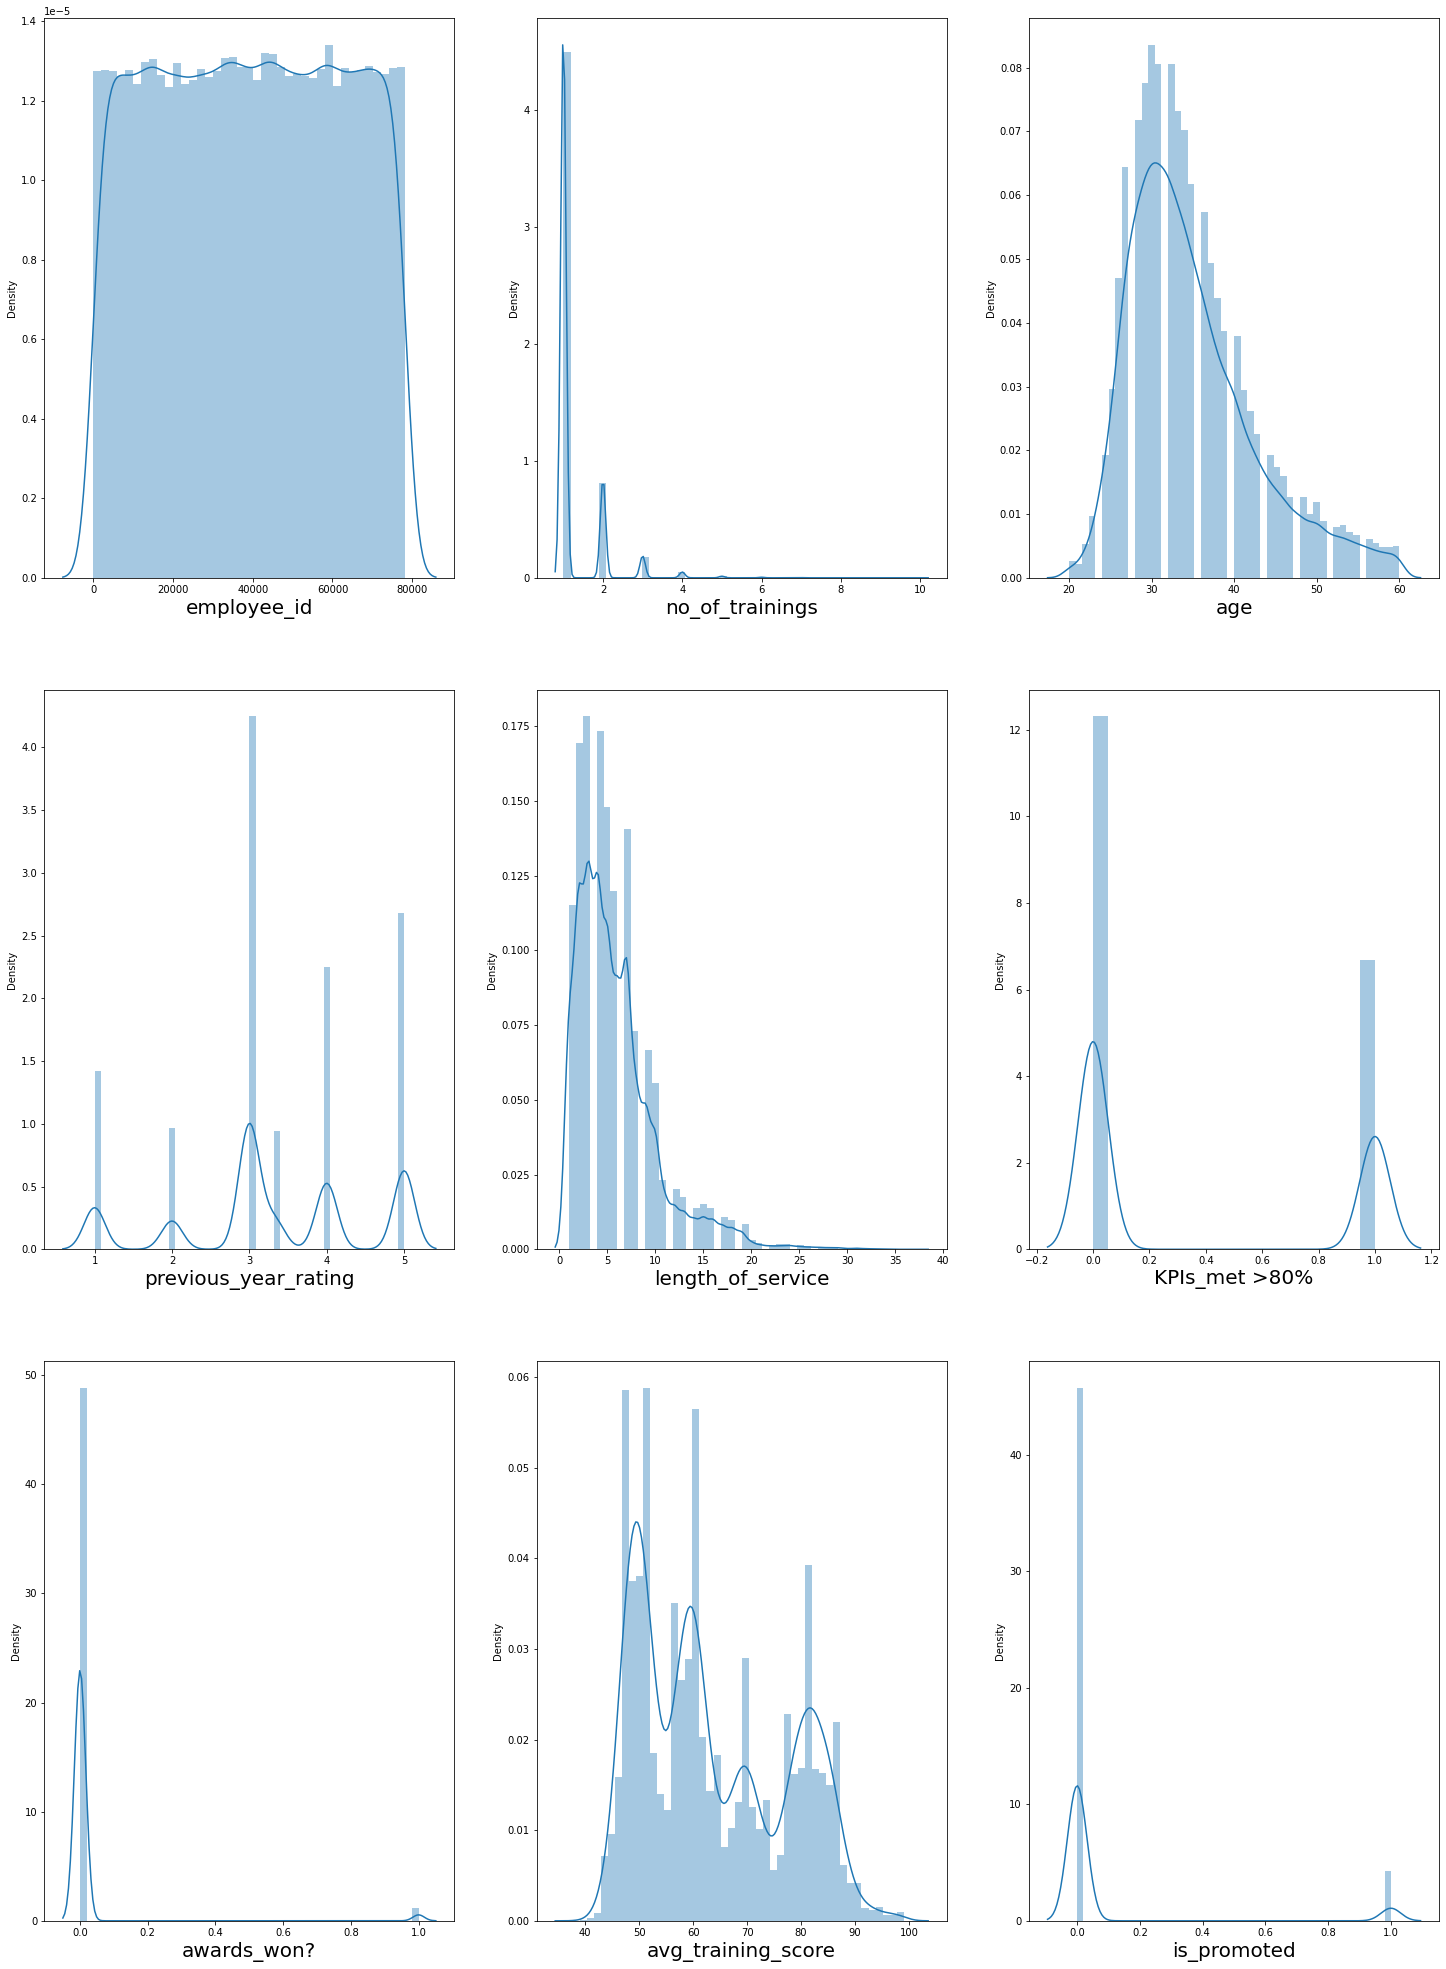

In [ ]:
plt.figure(figsize=(25,35))
plotnumber = 1

for column in num_col:
    if plotnumber<10 : ## 10 columns in data 
        plt.subplot(3,3,plotnumber)## 3 : rows , 3: columns , plotnumber : position of plot
        sns.distplot(train[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

After checking our data, I saw some columns as normal Distributed & some Columns right-skewed.

#Check Outlies traing data set


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

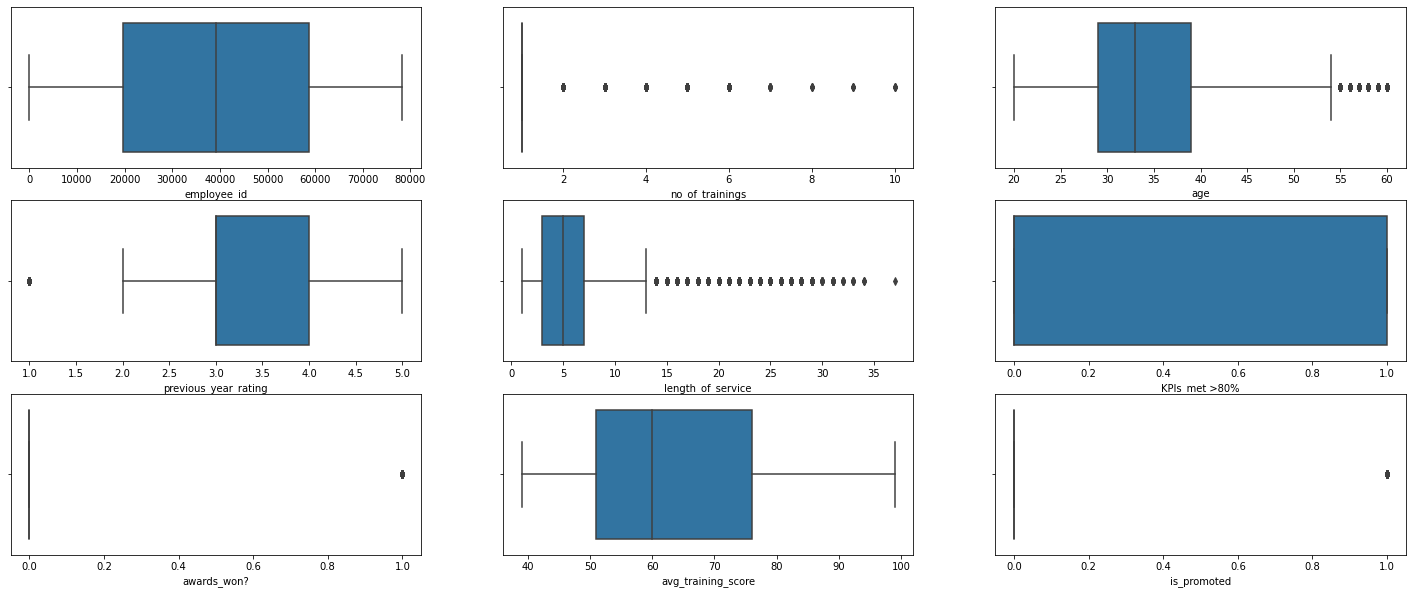

In [ ]:
plt.figure(figsize=(25,35))
for i, var in enumerate(num_col):
    plt.subplot(10,3,i+1)
    sns.boxplot(train[var])

## If outliers Present our dataset then our model give result in a poor fit and lower prediction.it necessry remove outliears present our dataset.
## in Dataset present outlier column.
1. length of service


In [ ]:
#Check summary of Columns length_of_service
print("Mean Value of length_of_service = ",train['length_of_service'].mean())
print("Max Value of length_of_service = ",train['length_of_service'].max())
print("Min Value of length_of_service = ",train['length_of_service'].min())
print("Std Value of length_of_service = ",train['length_of_service'].std())

Mean Value of length_of_service =  5.865512333965844
Max Value of length_of_service =  37
Min Value of length_of_service =  1
Std Value of length_of_service =  4.265094179685835


In [ ]:
# find the boundry outliers
print("Upper limit = ",train['length_of_service'].mean()+3*train['length_of_service'].std())
print("Lower Limit = ",train['length_of_service'].mean()-3*train['length_of_service'].std())

Upper limit =  18.66079487302335
Lower Limit =  -6.929770205091659


In [ ]:
# Find outliers in cols
train[(train['length_of_service']>18)|(train['length_of_service']<-6)]


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
42,23560,HR,region_2,Bachelor's,m,sourcing,1,59,4.0,26,1,0,52,0
109,32672,Analytics,region_22,Master's & above,m,other,1,42,2.0,19,0,0,79,0
268,34312,Procurement,region_2,Master's & above,f,other,2,54,4.0,23,0,0,66,0
329,469,Technology,region_2,Bachelor's,f,sourcing,1,57,3.0,19,0,0,81,0
404,46862,Procurement,region_7,Master's & above,m,other,1,49,5.0,20,1,0,65,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54544,40027,Operations,region_2,Bachelor's,m,other,1,53,5.0,26,1,0,60,0
54578,6905,Technology,region_7,Master's & above,m,sourcing,1,54,3.0,25,0,0,81,0
54580,72928,Technology,region_7,Master's & above,f,other,1,57,3.0,31,0,0,77,0
54617,67505,Sales & Marketing,region_2,Master's & above,f,other,1,57,5.0,24,0,0,49,0


In [ ]:
train.shape

(54808, 14)

In [ ]:
#Trimming Outliers 
train=train[(train['length_of_service']<18.6) & (train['length_of_service']>-6.9)]

In [ ]:
train.shape

(53833, 14)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


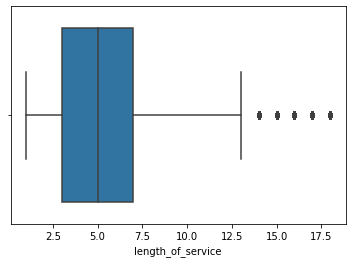

In [ ]:

#Check outliers After remove
sns.boxplot(train['length_of_service'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


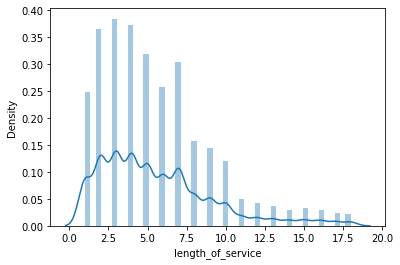

In [ ]:
sns.distplot(train["length_of_service"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Previous_year_rating')

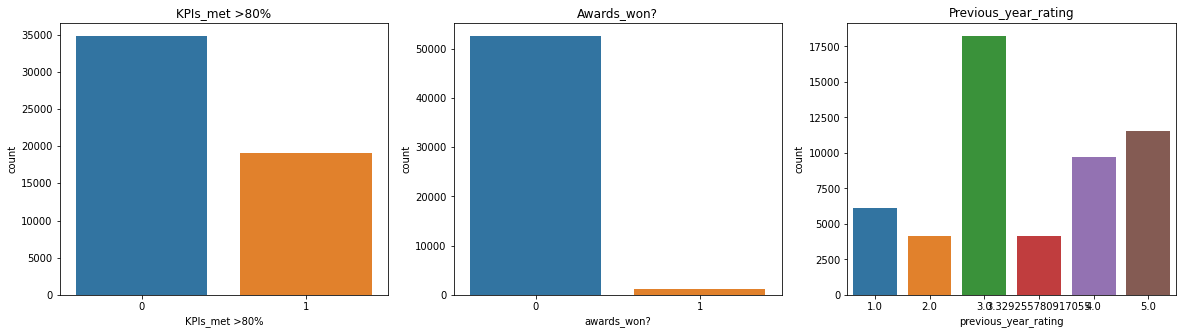

In [ ]:
 # Let's check how many employees get awards & low ratings & High KPI Set with help of the count plot.
 plt.figure(figsize=(20,5))
 plt.subplot(1,3,1)
 sns.countplot(train["KPIs_met >80%"])
 plt.title("KPIs_met >80%",fontsize=12)
 plt.subplot(1,3,2)
 sns.countplot(train['awards_won?'])
 plt.title("Awards_won?",fontsize=12)
 plt.subplot(1,3,3)
 sns.countplot(train['previous_year_rating'])
 plt.title("Previous_year_rating",fontsize=12)

I looked help to the with count plot only some employees could reach above 80% of the KPI set. and most Employees have a very low rating for the previous year's rating. and maybe a few employees could get awards for their work.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Distribution of Training taken by Employees')

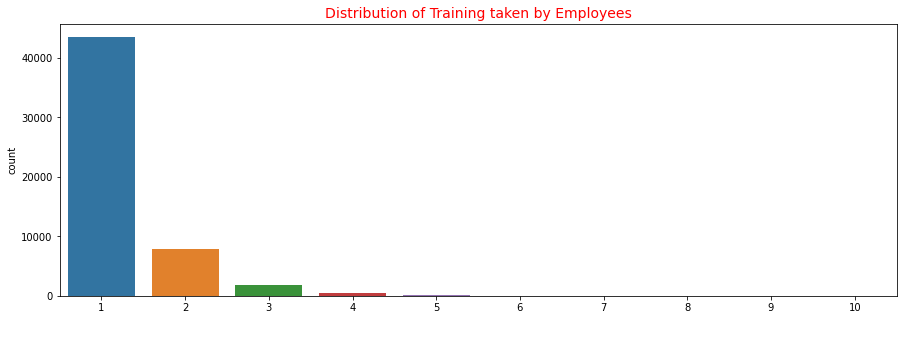

In [ ]:
#Let's check the distribution of training undertaken by the employees.
plt.figure(figsize=(15,5))
sns.countplot(train['no_of_trainings'])
plt.xlabel(" ",fontsize=12)
plt.title("Distribution of Training taken by Employees",fontsize=14,color="red")

Show this graph 80% Employees one time taken the training. and 15% of employees two times taken training and 3% of employees three-time taken training,2% of employees four-time taken the training.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Region')

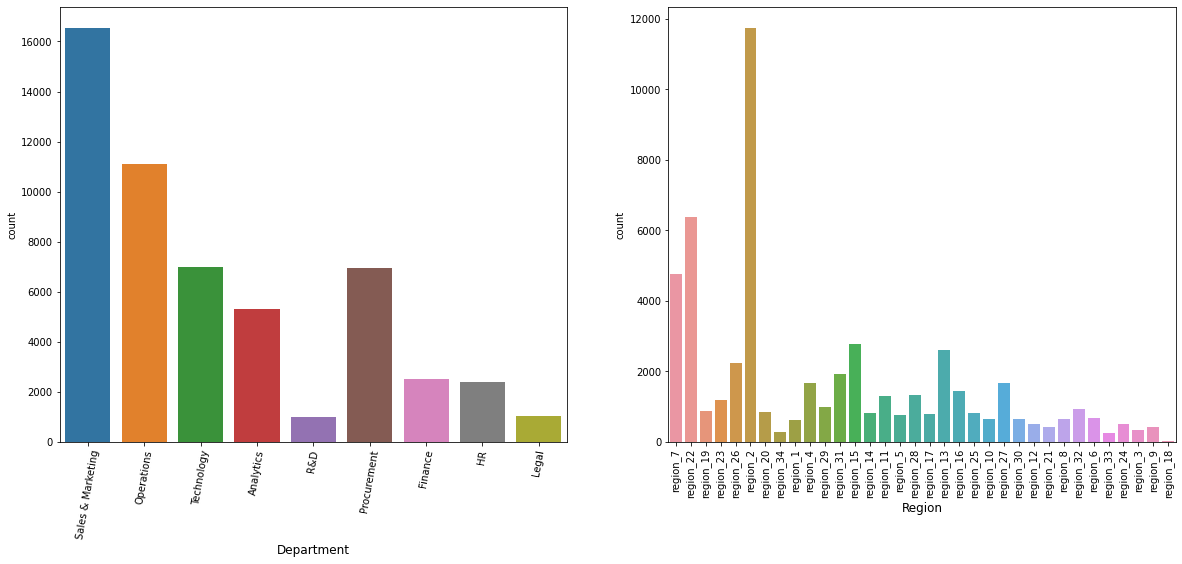

In [ ]:
#Let's check other columns with help of the count plot.
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.countplot(train['department'])
plt.xticks(rotation = 80)
plt.xlabel("Department",fontsize=12)
plt.subplot(1,2,2)
sns.countplot(train['region'])
plt.xticks(rotation=90)
plt.xlabel("Region",fontsize=12)

1. I have seen after in this graph High Majority Sales & Marketing employees in the department. And the low majority of R&D Employees in the Department.
2. High Region region no -02 and Low Region are region no 33.

Text(0.5, 0, 'Employees of Age')

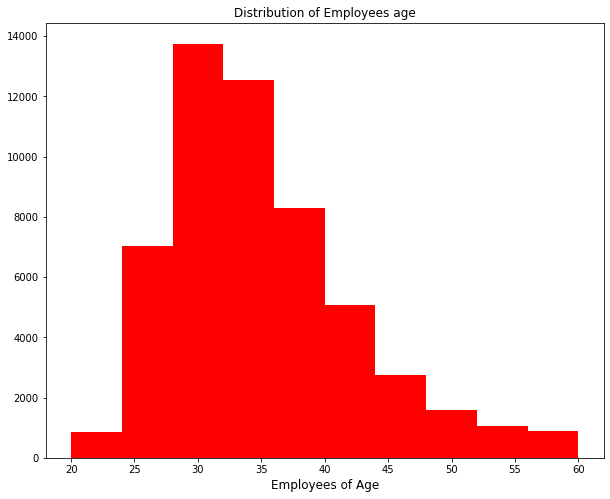

In [ ]:
#Let's check Age of Employees
plt.figure(figsize=(10,8))
plt.hist(train['age'],color='red')
plt.title("Distribution of Employees age")
plt.xlabel("Employees of Age",fontsize=12)

Majority of Employees age 28 to 40.


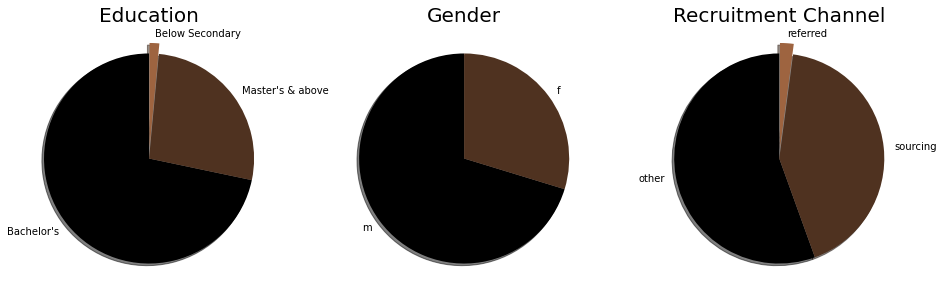

In [ ]:
# lets plot pie chart for the columns where we have very few categories
plt.rcParams['figure.figsize'] = (16,5)

# plotting a pie chart to represent share of Employees Education.
plt.subplot(1, 3, 1)
labels = train['education'].value_counts().index
sizes = train['education'].value_counts()
colors = plt.cm.copper(np.linspace(0, 1, 5))
explode = [0, 0, 0.1]

plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Education', fontsize = 20)

# plotting a pie chart to represent share of the Employees Gender
plt.subplot(1, 3, 2)
labels = train['gender'].value_counts().index
sizes = train['gender'].value_counts()
colors = plt.cm.copper(np.linspace(0, 1, 5))
explode = [0, 0]

plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Gender', fontsize = 20)

# plotting a pie chart to represent share of the Recruitment_channel
plt.subplot(1, 3, 3)
labels = train['recruitment_channel'].value_counts().index
sizes = train['recruitment_channel'].value_counts()
colors = plt.cm.copper(np.linspace(0, 1, 5))
explode = [0,0,0.1]

plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Recruitment Channel', fontsize = 20)

plt.show()

In Education Very Few employees are actually working only after their Secondary Education,& more employees are working after their Bachelore's.And in gender Females are again in Minority as compared to their Male. and the Recruitment Channel,I says that the Referred Employees are very less.

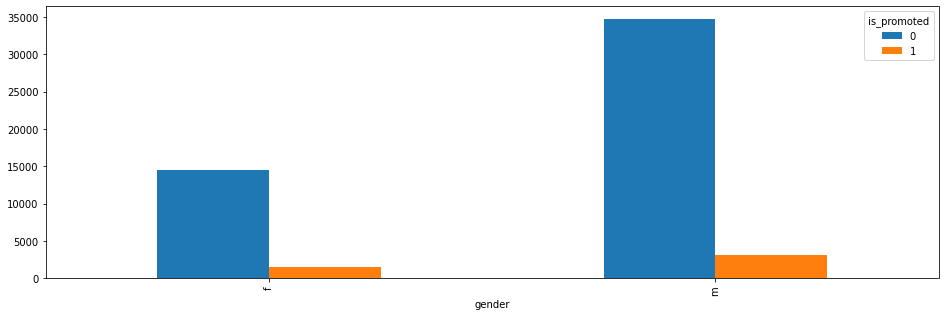

In [ ]:
# Crosstab()function show data frequency

pd.crosstab(train['gender'],train['is_promoted']).plot(kind='bar',stacked = False)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


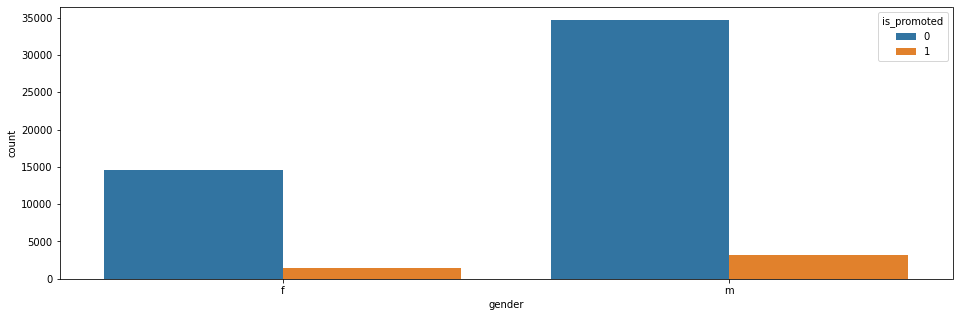

In [ ]:
sns.countplot(train['gender'],hue=train['is_promoted'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


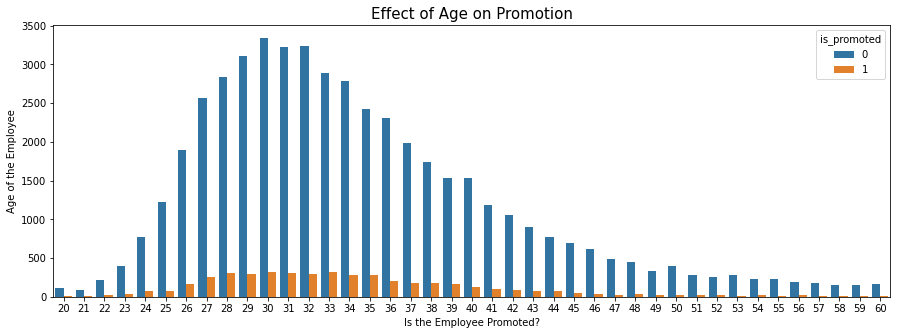

In [ ]:
plt.rcParams['figure.figsize'] = (15,5)
sns.countplot(train['age'], hue=train['is_promoted'])
plt.title('Effect of Age on Promotion', fontsize = 15)
plt.xlabel('Is the Employee Promoted?', fontsize = 10)
plt.ylabel('Age of the Employee', fontsize = 10)
plt.show()

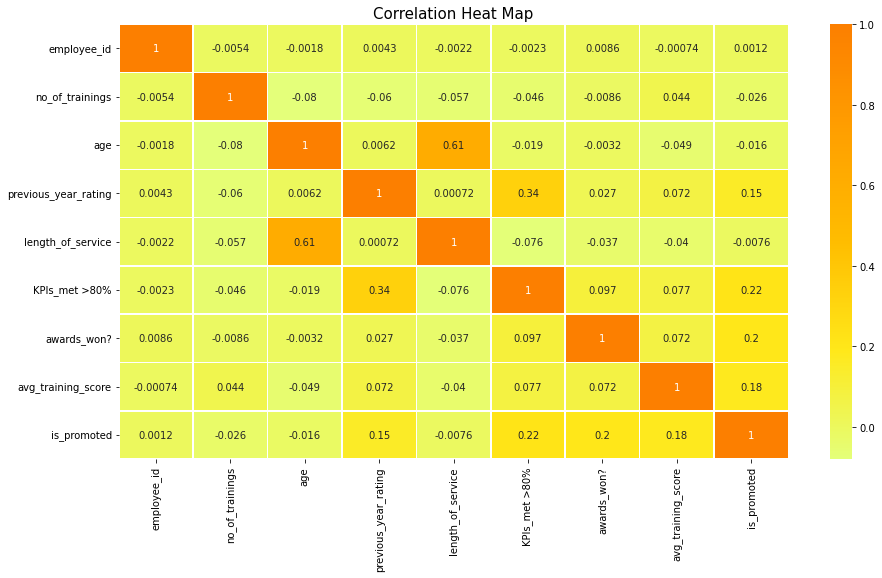

In [ ]:
# lets check the Heat Map for the Data with respect to correlation.
plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(train.corr(), annot = True, linewidth = 0.5, cmap = 'Wistia')
plt.title('Correlation Heat Map', fontsize = 15)
plt.show()
